In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
filename = "../data/raw/AirQualityUCI.csv"
df = pd.read_csv(
    filename,
    delimiter=';',
    decimal=',',
)

# parsing and dropping columns
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)

# missing values
df.dropna(how='all', inplace=True)
df.replace(-200, pd.NA, inplace=True)
col = [c for c in df.columns if c not in ['DateTime']]
df[col] = df[col].apply(pd.to_numeric, errors='coerce')
df.interpolate(method='linear', inplace=True)

# round
c = [c for c in df.columns if c not in ['DateTime', 'AH']]
df[c] = df[c].apply(lambda x: x.round(1))

# index datetime
df.set_index('DateTime', inplace=True)

# save this cleaned data as csv
df_line = (df.groupby(df.index.floor('D'))
            .mean()
            .round(2)
            .reset_index()
            .rename(columns={'DateTime': 'Date'})
        )
df_line

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1.97,1316.50,86.50,8.45,912.33,132.00,1167.33,108.83,1545.50,1096.00,12.03,54.90,0.77
1,2004-03-11,2.17,1244.17,104.50,7.98,851.96,139.75,1277.25,97.67,1522.83,885.25,9.84,64.08,0.78
2,2004-03-12,2.76,1281.67,158.38,12.13,1008.29,171.69,1101.88,114.62,1627.29,1084.38,11.29,51.10,0.66
3,2004-03-13,2.64,1330.67,139.25,10.92,992.83,180.75,993.21,117.35,1595.79,1245.92,12.87,51.53,0.73
4,2004-03-14,2.44,1361.12,116.96,9.64,943.92,144.62,1001.29,109.67,1602.38,1234.21,16.01,48.85,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2005-03-31,1.39,1008.12,275.00,5.22,749.42,185.08,795.67,100.71,1176.54,763.83,17.55,50.08,0.95
387,2005-04-01,1.08,903.29,275.00,3.41,663.00,161.83,946.88,107.33,943.25,523.96,15.93,35.96,0.64
388,2005-04-02,0.85,890.96,275.00,2.53,616.29,142.38,991.75,100.17,864.33,481.75,15.48,32.22,0.55
389,2005-04-03,1.14,981.38,275.00,4.32,714.71,167.67,856.17,111.12,985.17,717.08,18.38,33.70,0.62


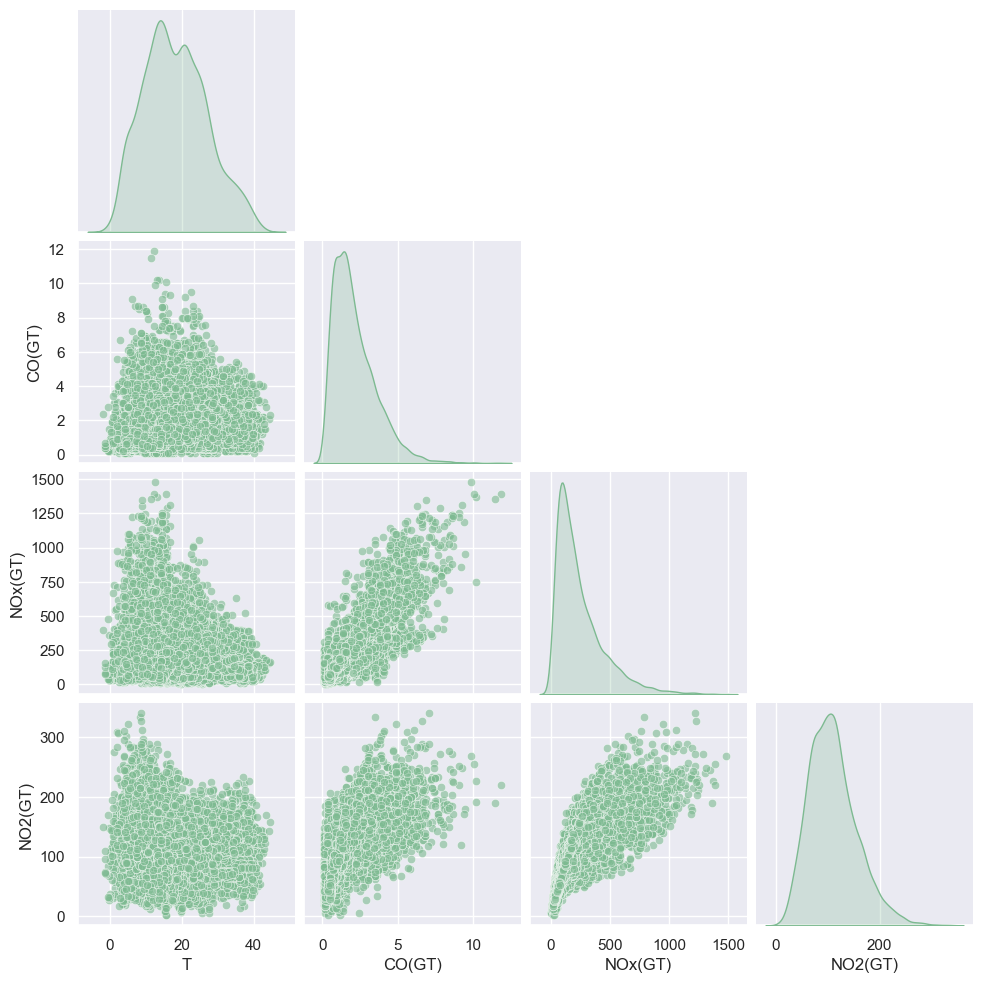

In [16]:

# global theme and palette
sns.set_theme(style="darkgrid", palette='crest')
sns.pairplot(df[['T', 'CO(GT)', 'NOx(GT)', 'NO2(GT)']], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})

Text(0.05, 0.95, 'Correlation (r) = -0.246')

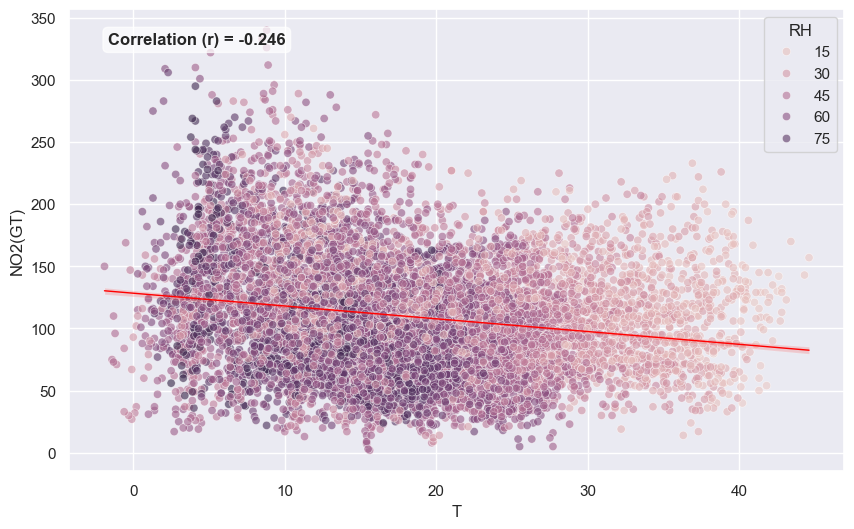

In [17]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='T', y='NO2(GT)', hue='RH', alpha=0.6, ax=ax1)
sns.regplot(data=df, x='T', y='NO2(GT)', scatter=False, color='red', line_kws={'lw': 1}, ax=ax1)

# Compute correlation
corr = df[['T', 'NOx(GT)']].corr().iloc[0, 1]

ax1.text(
    0.05, 0.95,                          # position (x, y) relative to axes (0–1)
    f'Correlation (r) = {corr:.3f}',     # text content
    transform=ax1.transAxes,              # relative to this Axes, not global
    fontsize=12,
    fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
    va='top'                             # vertical alignment (so it sticks to top edge)
)

In [18]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

Text(0.05, 0.95, 'Correlation (r) = 0.134')

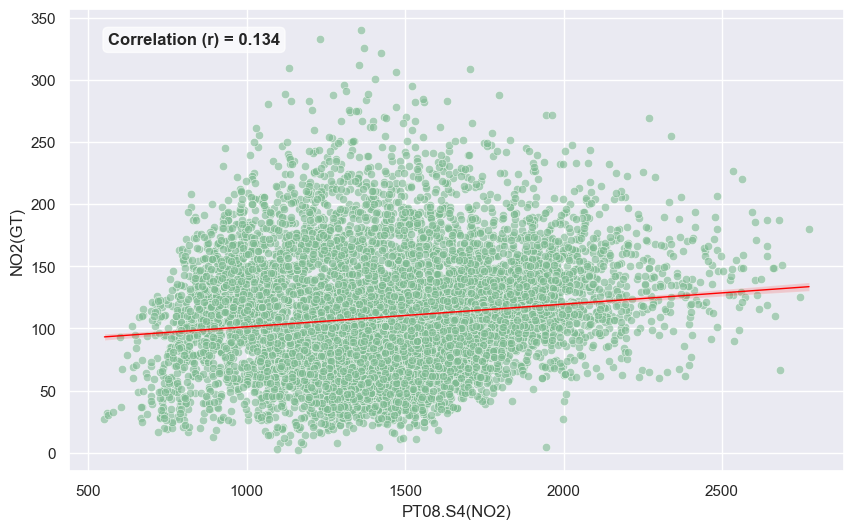

In [19]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='PT08.S4(NO2)', y='NO2(GT)', alpha=0.6, ax=ax2)
sns.regplot(data=df, x='PT08.S4(NO2)', y='NO2(GT)', scatter=False, color='red', line_kws={'lw': 1}, ax=ax2)

# Compute correlation
corr = df[['PT08.S4(NO2)', 'NO2(GT)']].corr().iloc[0, 1]

ax2.text(
    0.05, 0.95,                          # position (x, y) relative to axes (0–1)
    f'Correlation (r) = {corr:.3f}',     # text content
    transform=ax2.transAxes,              # relative to this Axes, not global
    fontsize=12,
    fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
    va='top'                             # vertical alignment (so it sticks to top edge)
)

### **Correlation Interpretation**
- `r = 1` means strong direct correlation
- `r = 0` means no relation
- `r = -1` means strong inverse relation

[0.00520989]
-3.616173901795531
mean is -1.2149923877483812e-17
standard dev is 0.87


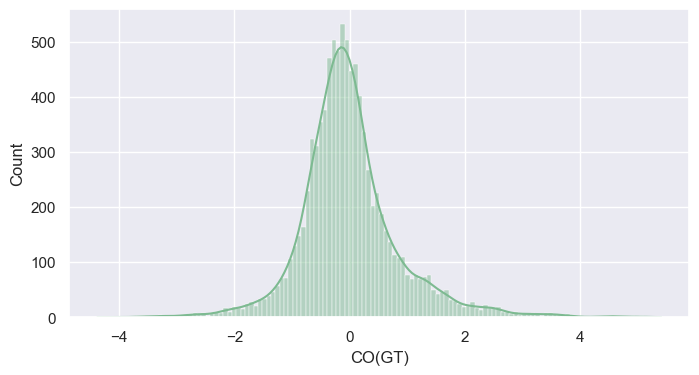

In [20]:
x = df[['PT08.S1(CO)']]
y = df.loc[x.index, 'CO(GT)']

model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
residuals = y - y_pred
print(model.coef_)
print(model.intercept_)

fig3, ax3 = plt.subplots(figsize=(8,4))
sns.histplot(x=residuals, kde=True, ax=ax3)
print('mean is', residuals.mean())
print('standard dev is', round(residuals.std(), 2))

In [21]:
print(y)
print(y_pred)
mae = mean_absolute_error(y, y_pred)
print(mae)

DateTime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
2005-04-04 10:00:00    3.1
2005-04-04 11:00:00    2.4
2005-04-04 12:00:00    2.4
2005-04-04 13:00:00    2.1
2005-04-04 14:00:00    2.2
Name: CO(GT), Length: 9357, dtype: float64
[3.46928246 3.11500964 3.68809802 ... 2.33352548 1.60935017 1.96362298]
0.60360237710857


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X_train, y_train)
r2_train = model2.score(X_train, y_train)
r2_test = model2.score(X_test, y_test)
print(f'R2 on train is {r2_train}')
print(f'R2 on test is {r2_test}')
print(r2_train - r2_test)

R2 on train is 0.6287385307011883
R2 on test is 0.6362910673708726
-0.007552536669684251
